In [2]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

Description of the problem:

According to some theories in astronomy, gas-poor galaxies are created by merging two other gas-poor ones. Here, we want to investigate that whether this assumption is true or not. To do this, we make several observations and count gas-poor galaxies which have a companion. As you may guess, our observations follow a binomial distribution (keep in mind that here f means the fraction of galaxies which have such companies):

Sequential sampling (2 chains in 1 job)
Metropolis: [f]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 6 seconds.
The number of effective samples is smaller than 25% for some parameters.


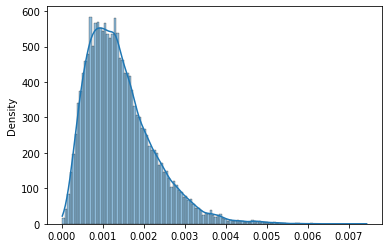

In [4]:
with pm.Model():
    f = pm.Uniform('f',0,1) # f = prior
    obs = pm.Binomial('obs',n=2127,p=f,observed = 2) # observed = r
    step = pm.Metropolis()
    trace = pm.sample(20000,step)

sns.histplot(trace['f'] , stat = 'density' , kde =1)
plt.show()

You can find the analytical solution of this problem in 'mathematical_proofs' folder.